<a href="https://colab.research.google.com/github/rifrif12/Naive-Bayes-Smote/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction**


How do we achieve good predictive power in the statistical model?  Let's find out!
1. Install the necessary packages



In [122]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Read the Data & convert it into Dataframe**

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
data = pd.read_csv(r'/content/drive/MyDrive/data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# **Descriptive variable grouped by Outcome of diabetes**

In [125]:
data.groupby('Outcome').Pregnancies.describe()


,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,3.298000,3.017185,0.0,1.00,2.0,5.0,13.0
1,268.0,4.865672,3.741239,0.0,1.75,4.0,8.0,17.0


In [126]:
data.groupby('Outcome').Glucose.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,497.0,110.643863,24.776906,44.0,93.0,107.0,125.0,197.0
1,266.0,142.319549,29.599199,78.0,119.0,140.0,167.0,199.0


In [127]:
data.groupby('Outcome').BloodPressure.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,481.0,70.877339,12.161223,24.0,62.0,70.0,78.0,122.0
1,252.0,75.321429,12.299866,30.0,68.0,74.5,84.0,114.0


In [128]:
data.groupby('Outcome').SkinThickness.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,361.0,27.235457,10.026491,7.0,19.0,27.0,33.0,60.0
1,180.0,33.000000,10.327595,7.0,27.0,32.0,39.0,99.0


In [129]:
data.groupby('Outcome').Insulin.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [130]:
data.groupby('Outcome').BMI.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,491.0,30.859674,6.560737,18.2,25.6,30.1,35.300,57.3
1,266.0,35.406767,6.614982,22.9,30.9,34.3,38.925,67.1


In [131]:
data.groupby('Outcome').DiabetesPedigreeFunction.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
1,268.0,0.550500,0.372354,0.088,0.26250,0.449,0.72800,2.420


In [132]:
data.groupby('Outcome').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


# **Handling Missing Values**
Beberapa variabel terlihatnya jumlahnya berbeda-beda dikarenakan adanya missing 


In [133]:
# showing the count of Missing Values
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [134]:
# Create Column list and define their colours
columns=data.columns
columns=list(columns)
columns.pop()
colours=['b','c','g','k','m','r','y','b']

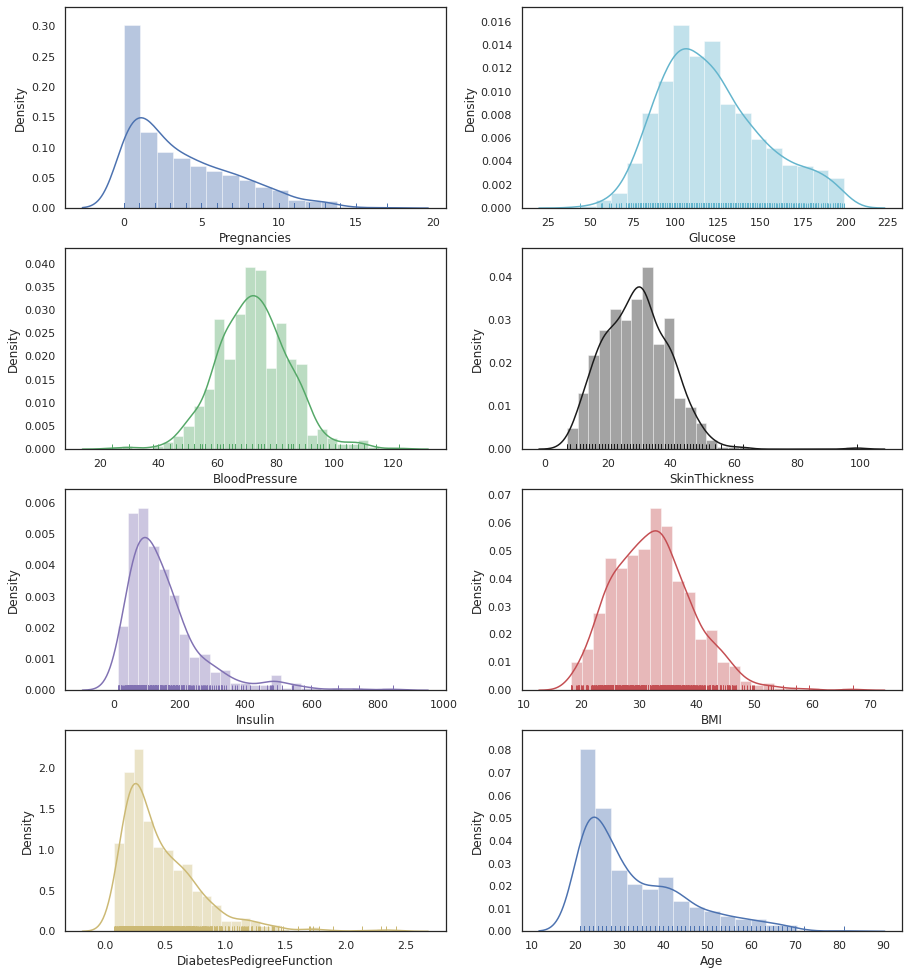

In [135]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(data[columns[i]], hist=True, rug=True, color=colours[i])

In [136]:
#Data yang berdistribusi Skew missing valuenya diganti dengan median
data_bersih = data.copy(deep = True)
data_bersih['Glucose'].fillna(data_bersih['Glucose'].mean(), inplace = True)
data_bersih['BloodPressure'].fillna(data_bersih['BloodPressure'].mean(), inplace = True)
data_bersih['SkinThickness'].fillna(data_bersih['SkinThickness'].median(), inplace = True)
data_bersih['Insulin'].fillna(data_bersih['Insulin'].median(), inplace = True)
data_bersih['BMI'].fillna(data_bersih['BMI'].median(), inplace = True)
print(data_bersih.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [137]:
#clean Data
data_bersih

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [138]:
data_bersih.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


# **Data Splitting**

In [139]:
#Scaling data
Standarisasi_X = StandardScaler()
X =  pd.DataFrame(Standarisasi_X.fit_transform(data_bersih.drop(["Outcome"],axis = 1)),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data_bersih['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [140]:
#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=5)

# **Handling Imbalance using SMOTE**

In [141]:
smote = SMOTE()
print('before smote data shape =',X_train.shape) 
X_train,y_train = smote.fit_resample(X_train,y_train)
print('after smote data shape =', X_train.shape) 


before smote data shape = (691, 8)
after smote data shape = (894, 8)


# **Naive Bayes for Diabetes Prediction**

In [142]:
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [143]:
y_pred = NB.predict(X_test)

In [144]:
#Melihat Confusion Matrix dari model yang telah dibuat
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,36,17,53
1,5,19,24
All,41,36,77


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        53
           1       0.53      0.79      0.63        24

    accuracy                           0.71        77
   macro avg       0.70      0.74      0.70        77
weighted avg       0.77      0.71      0.72        77



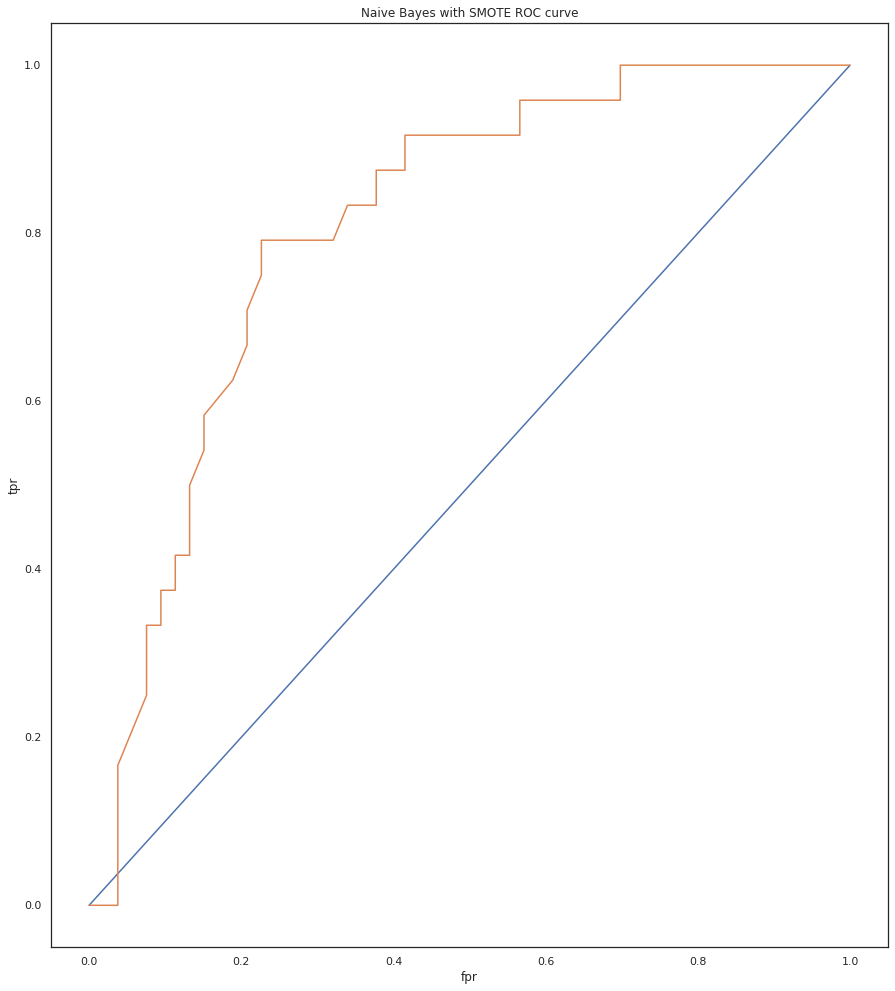

0.809

In [146]:
y_pred_proba = NB.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes with SMOTE ROC curve')
plt.show()
round(roc_auc_score(y_test, y_pred_proba),3)
